In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [28]:
plt.style.use('fivethirtyeight')

In [2]:
DATA_FILE = '../data/Problem_C_Data_Wordle.xlsx'
df = pd.read_excel(DATA_FILE,header=1)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()
df.rename(columns={'Date':'date','Contest number':'contest_num','Word':'word','Number of  reported results':'num_results','Number in hard mode':'num_hardmode','1 try':'in1','2 tries':'in2','3 tries':'in3','4 tries':'in4','5 tries':'in5','6 tries':'in6','7 or more tries (X)':'over6'},inplace=True)


In [4]:
df.loc[15,'word'] = 'probe'
df.loc[35,'word'] = 'clean'
df.loc[246,'word'] = 'trash'
df.loc[353,'word'] = 'favor'
df.loc[20,'word'] = 'naive'

In [5]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [6]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  in6  over6  day_of_week 

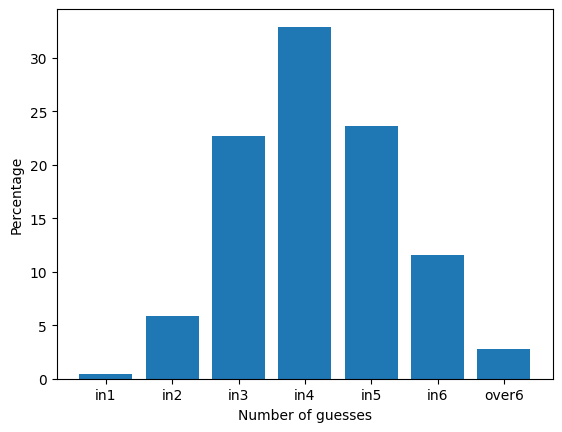

In [7]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')

plt.show()

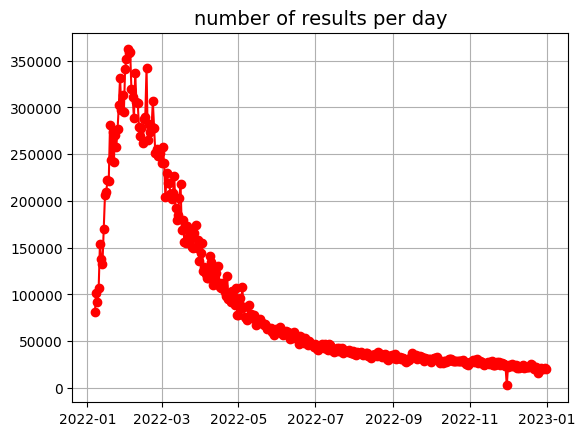

In [8]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


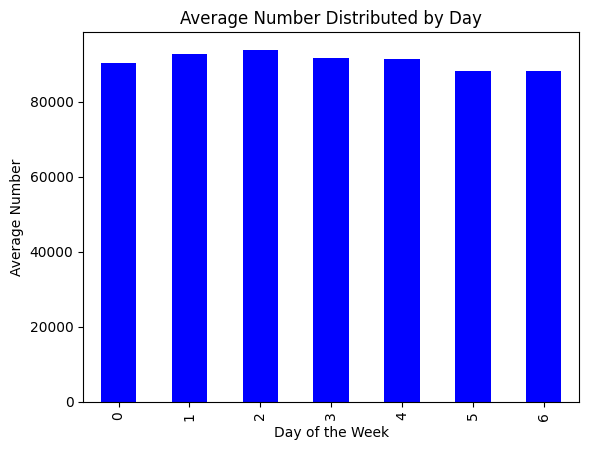

In [9]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [ ]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



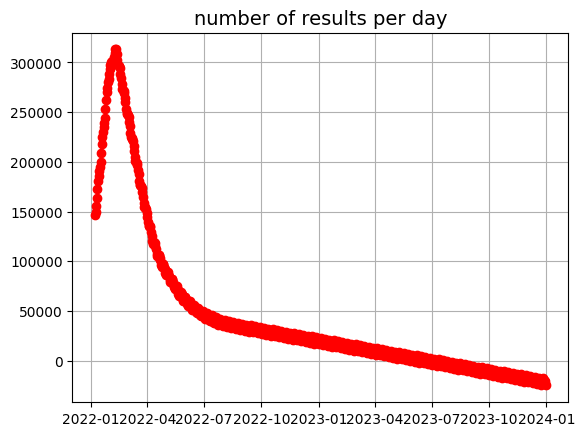

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13254.302233,-45383.223391,76077.983868,-46321.425703,69510.961743,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,16468.671929


In [ ]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


18:21:13 - cmdstanpy - INFO - Chain [1] start processing
18:21:13 - cmdstanpy - INFO - Chain [1] done processing


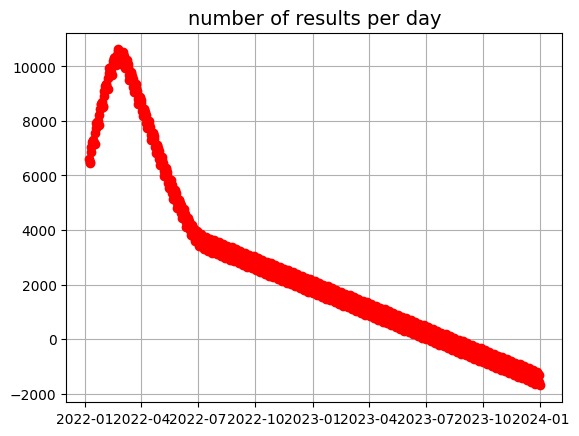

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1428.631998,-305.853372,3554.365529,403.251304,2365.248294,175.957446,175.957446,175.957446,175.957446,175.957446,175.957446,0.0,0.0,0.0,1604.589444


In [ ]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


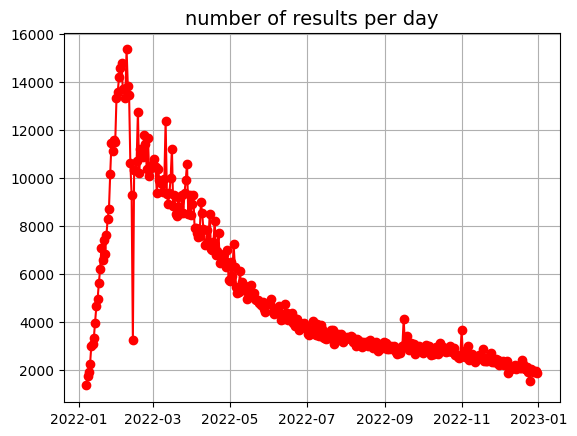

In [ ]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


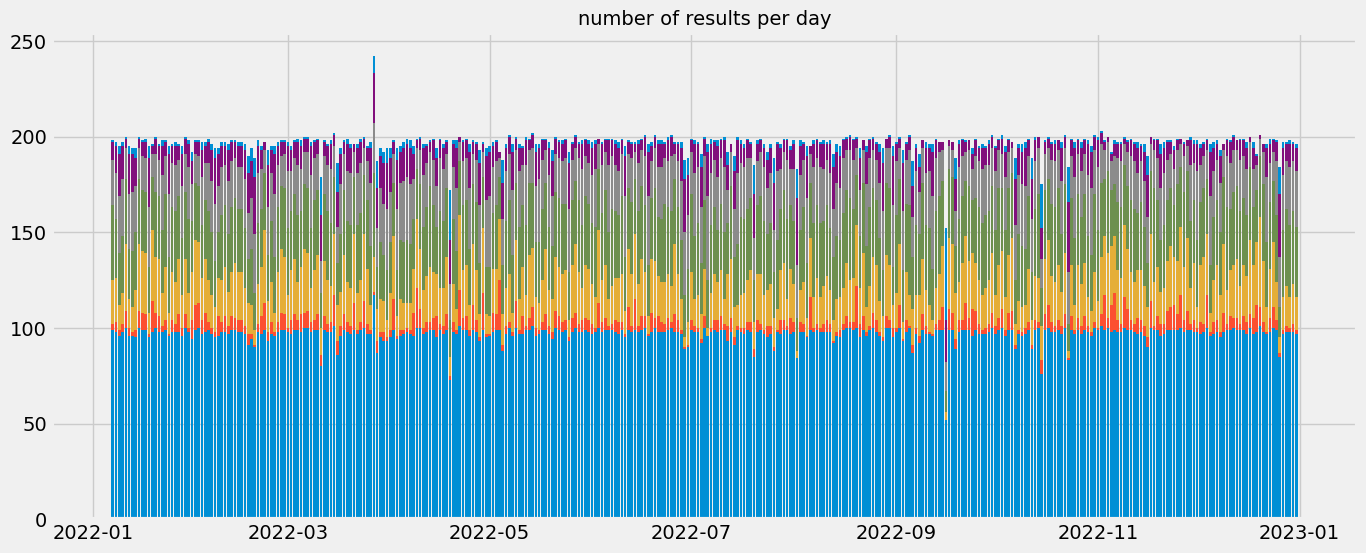

In [29]:
plt.figure(figsize=(15,6))
plt.bar(df['date'], df['in1'])
bottom=df.in1
plt.bar(df['date'], df['in2'], bottom=bottom)
bottom+=df.in2
plt.bar(df['date'], df['in3'], bottom=bottom)
bottom+=df.in3
plt.bar(df['date'], df['in4'],bottom=bottom)
bottom+=df.in4
plt.bar(df['date'], df['in5'],bottom=bottom)
bottom+=df.in5
plt.bar(df['date'], df['in6'], bottom=bottom)
bottom+=df.in6
plt.bar(df['date'], df['over6'],bottom=bottom)

plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


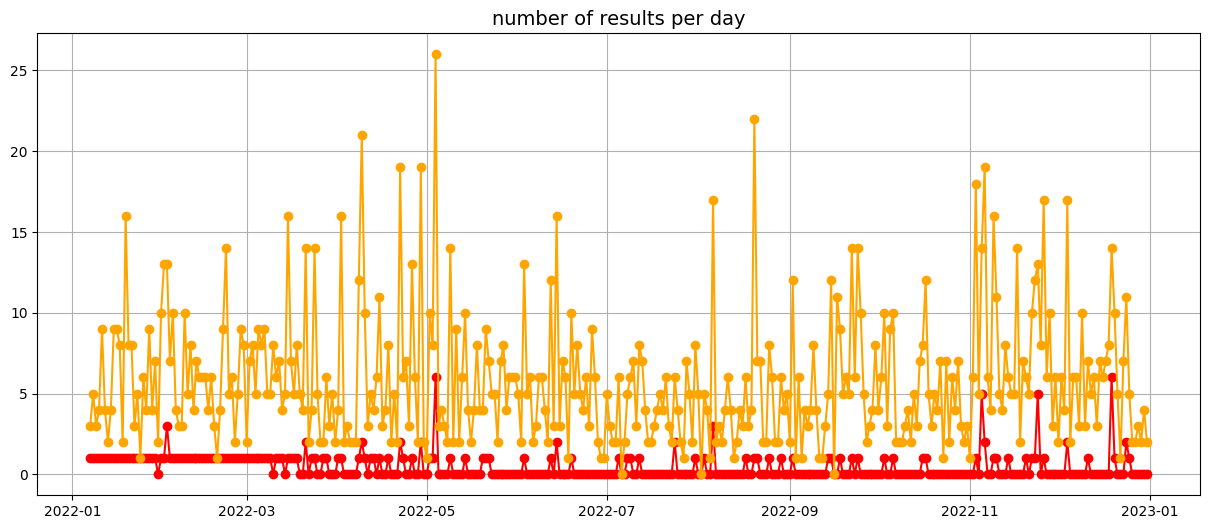

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df['date'], df['in1'], color='red', marker='o')
plt.plot(df['date'], df['in2'], color='orange', marker='o')
plt.plot(df['date'], df['in3'], color='yellow', marker='o')
plt.plot(df['date'], df['in4'], color='green', marker='o')
plt.plot(df['date'], df['in5'], color='blue', marker='o')
plt.plot(df['date'], df['in6'], color='purple', marker='o')
plt.plot(df['date'], df['over6'], color='black', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()
